## 백테스팅 하기

In [ ]:
!python backtester.py

## 특성값 생성하기

In [ ]:
!python ./data_science/create_figures.py

## 모델 성능 기록하기

In [ ]:
!python ./data_science/stats.py

## 모델 생성하기

In [ ]:
!python ./models/lr_run_training.py

2022-04-14 06:11:57,280 - INFO - __LR_training__ - 학습할 종목코드: ['030350', '066910', '123420', '192080', '201490', '293490']
2022-04-14 06:12:02,890 - INFO - __LR_training__ - 91 samples were fetched from the database..
Created test and train data...
Training model...
Logistic regression model score: 1.0
Saved the model and scaler in /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market/saved_models
Figures saved in /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market/results/Confusion Matrices


# 당일 주가 방향성 확인

In [ ]:
%%writefile app.py
from models.lr_inference import *
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings(action="ignore")

end_date = datetime(2022,4,14)
start_date = end_date - timedelta(days=40)
start_date, end_date

tickers = {
    "삼성전자":"005930",
    "삼성전기":"009150",
    "대한전선":"001440",
    "LS전선아시아":"229640",
    "한국가스공사":"036460",
    "대아티아이":"045390",
    "진원생명과학":"011000",
    "SK케미칼":"285130"
}

for ticker in tickers:
    action = LR_v1_predict(tickers[ticker], start_date, end_date, threshold=0.98)
    print("#" * 50)
    print(f"{ticker}({tickers[ticker]}) 액션: {action[1]}, 종가: {action[2]}")
    print("#" * 50)

Overwriting app.py


In [ ]:
!python app.py

##################################################
삼성전자(005930) 액션: 1, 종가: 67500
##################################################
##################################################
삼성전기(009150) 액션: 1, 종가: 159000
##################################################
##################################################
대한전선(001440) 액션: 1, 종가: 1800
##################################################
##################################################
LS전선아시아(229640) 액션: 1, 종가: 8160
##################################################
##################################################
한국가스공사(036460) 액션: 1, 종가: 39850
##################################################
##################################################
대아티아이(045390) 액션: 1, 종가: 4310
##################################################
##################################################
진원생명과학(011000) 액션: 1, 종가: 12800
##################################################
##################################################
SK케미칼(285130) 액션: 1

In [ ]:
rm -rf /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market/results/LR_v1_predict_0.98_10

In [ ]:
cd /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market

/content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market


# 지수 종목 확인

http://data.krx.co.kr/contents/MDC/MAIN/main/index.cmd

In [ ]:
!python ./stock_utils/download.py

Progress: 50it [01:15,  1.52s/it]


In [ ]:
data = pd.read_csv(load_data_path, encoding="euc-kr", dtype="str")
data

In [ ]:
!python ./models/lr_run_offline_training.py

Created test and train data...
Training model...
Logistic regression model score: 0.8861047835990888
Saved the model and scaler in /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market/saved_models
Figures saved in /content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market/results/Confusion Matrices


# 시각화

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.color"] = "r"
plt.rcParams["axes.grid"] = True 

In [ ]:
os.getcwd()

'/content/drive/MyDrive/2022-연구노트/How-I-m-using-Machine-Learning-to-Trade-in-the-Stock-Market'

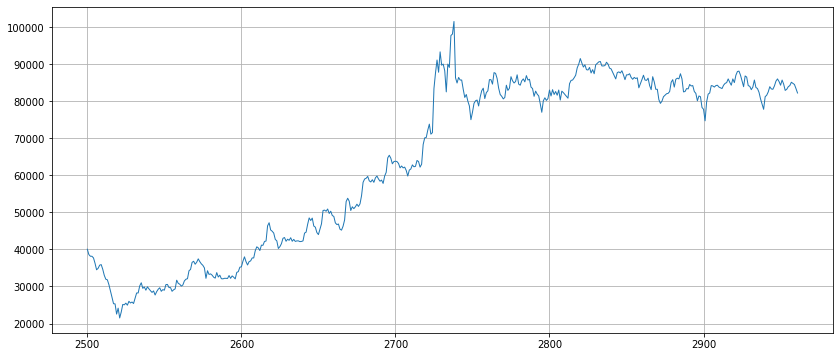

In [ ]:
load_data_path = os.getcwd()
load_data_path = os.path.join(load_data_path, "datasets")
load_data = os.path.join(load_data_path, "000270")
data = pd.read_csv(load_data)
data = data.iloc[2500:]

In [ ]:
data["loc_min"] = data.iloc[argrelextrema(data.close.values, np.less_equal, order = 10)[0]]["close"]
data["loc_max"] = data.iloc[argrelextrema(data.close.values, np.greater_equal, order = 10)[0]]["close"]
idx_with_mins = np.where(data["loc_min"] > 0)[0]
idx_with_maxs = np.where(data["loc_max"] > 0)[0]

(array([ 21,  44,  88,  96, 124, 138, 165, 192, 208, 249, 270, 295, 329,
        372, 401, 439, 461]),
 array([  0,  35,  72, 118, 156, 196, 238, 264, 279, 302, 320, 333, 385,
        423, 448]))

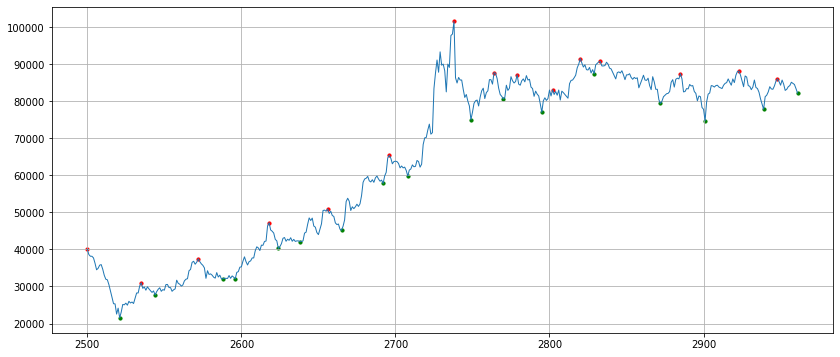

In [ ]:
plt.plot(data.index, data["close"])
plt.scatter(data.index, data["loc_max"], c="r", s=10)
plt.scatter(data.index, data["loc_min"], c="g", s=10)